# Создаём гифки

In [5]:
import os
import glob
import imageio

import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import scipy.stats as sts
plt.style.use('ggplot')   # Правильный стиль графиков   

%matplotlib inline

images = 'images/'

### 1. Закон больших чисел

In [ ]:
x = [ ]
y = [ ]
s = 0

for i in range(100):
    x.append(i)
    s += np.random.choice([1,2,3,4,5,6])
    y.append(s/len(x))
    
    fig, ax = plt.subplots()
    ax.set_xlabel('Число побрасываний')
    ax.set_ylabel('Среднее')
    ax.set_ylim(1,6)
    ax.set_xlim(0,100)

    ax.plot(x, y)
    ax.plot(list(range(100)),[3.5]*100)
    
    fig.savefig('images/{}.png'.format(i), dpi=80)
    

In [61]:
pause = 1
animated_gif_name = 'animation_LLN.gif'

def create_animated_gif(files, animated_gif_name, pause=0):
    if pause != 0:
        # Load the gifs up several times in the array, to slow down the animation
        frames = []
        for file in files:
            count = 0
            while count < pause:
                frames.append(file)
                count+=1
        print("Total number of frames in the animation:", len(frames))
        files = frames
    images = [imageio.imread(file) for file in files]
    imageio.mimsave(animated_gif_name, images, duration = 0.005)

In [103]:
image_path = 'images/*.png'
files = glob.glob(image_path)
files = sorted(files, key = lambda w: int(w.split('/')[-1].split('.')[0]))
create_animated_gif(files, animated_gif_name, pause)

Total number of frames in the animation: 100


![](animation_LLN.gif)

In [76]:
for f in glob.glob("images/*.png"):
    os.remove(f)

### 2. ЦПТ 

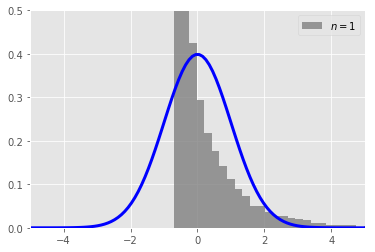

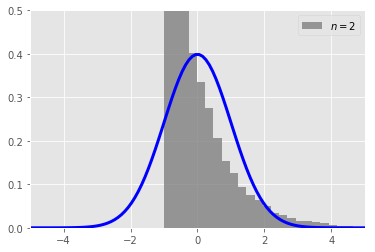

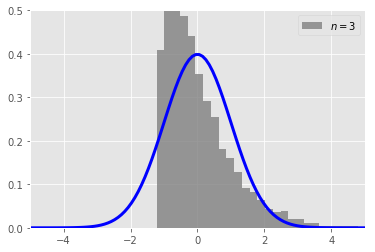

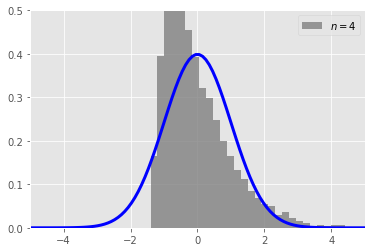

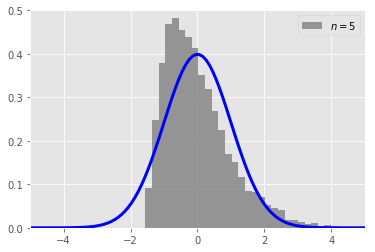

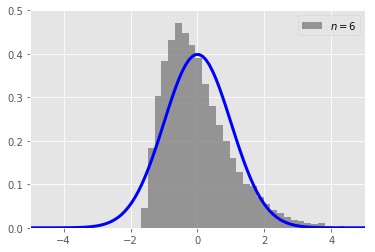

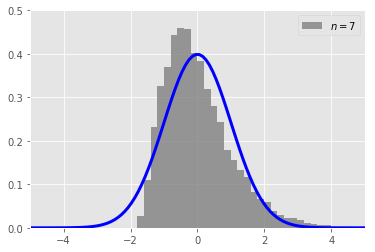

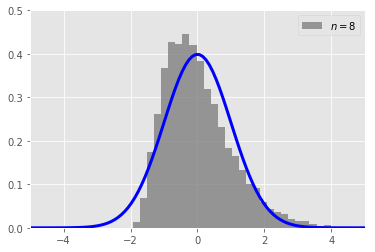

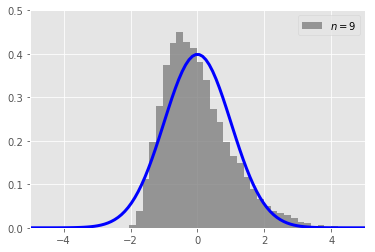

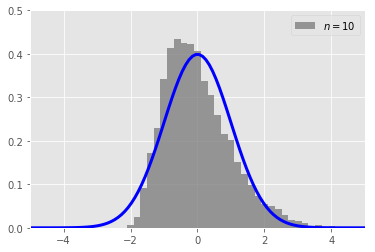

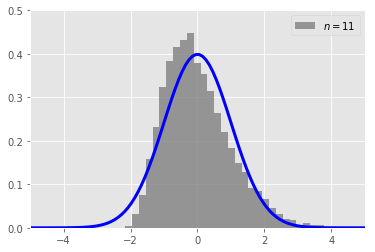

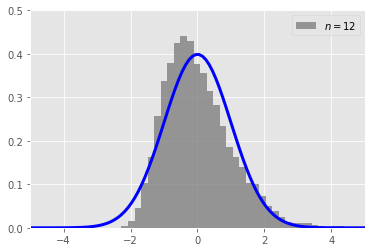

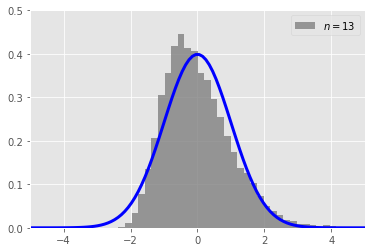

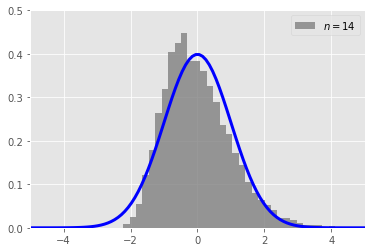

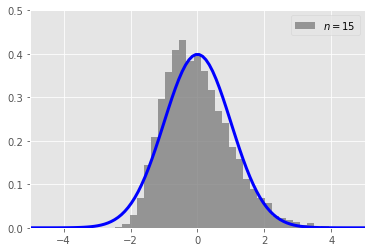

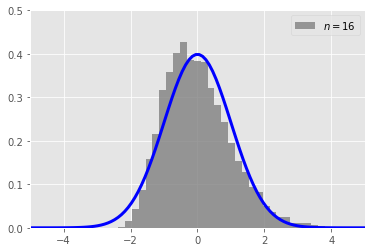

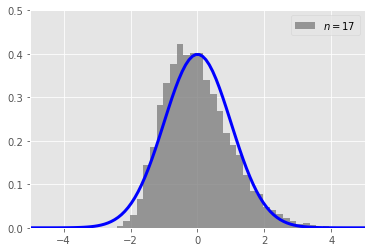

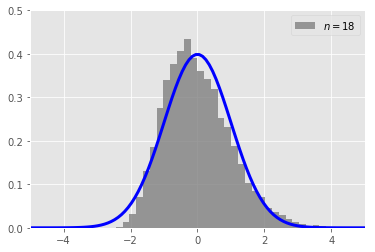

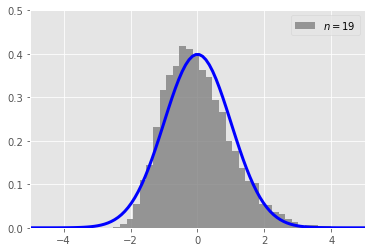

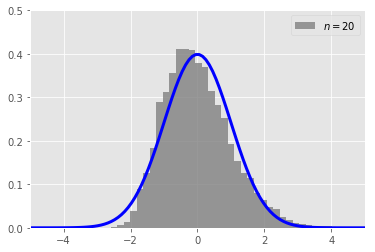

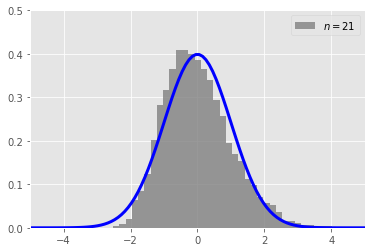

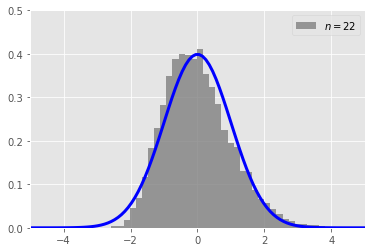

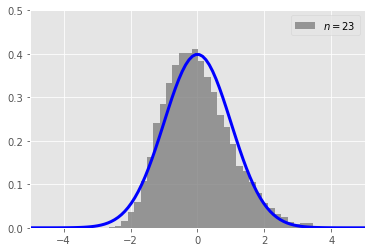

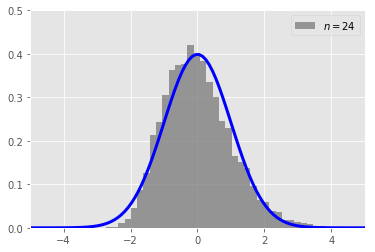

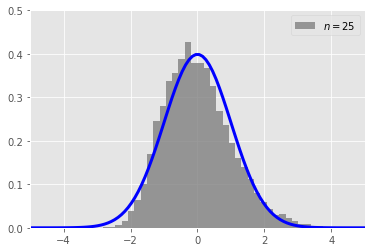

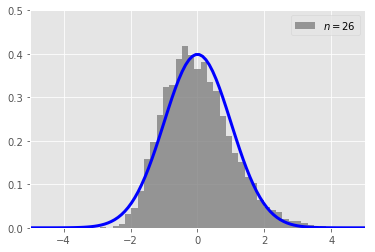

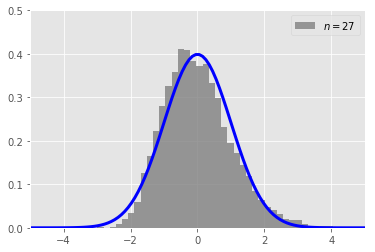

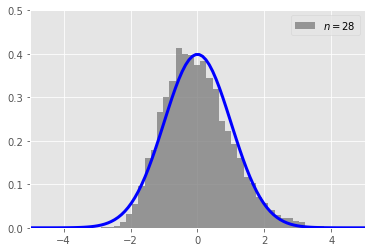

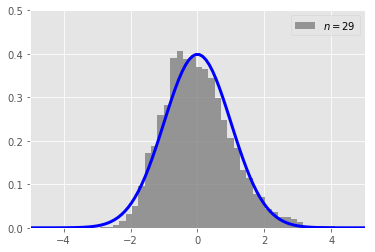

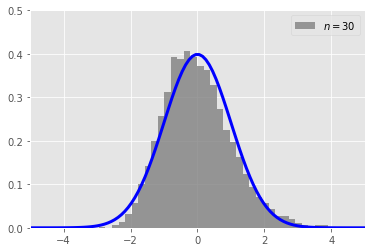

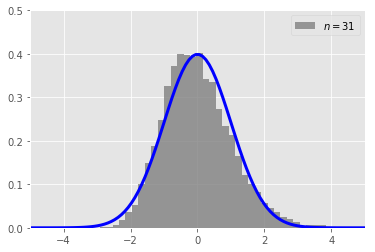

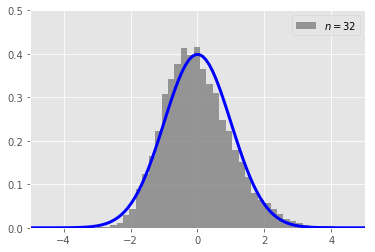

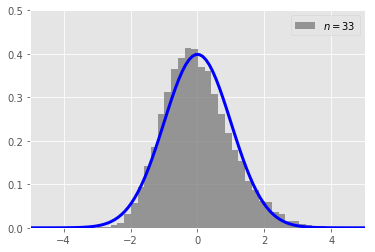

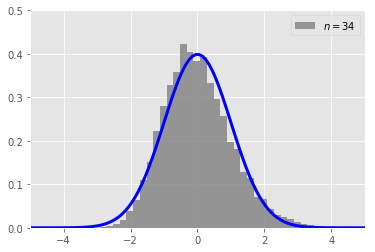

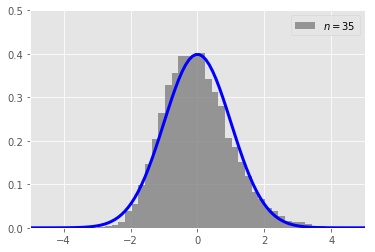

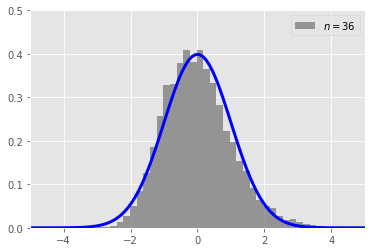

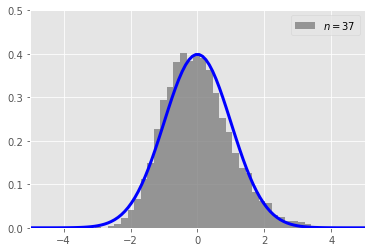

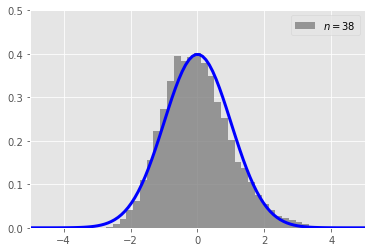

In [ ]:
#rv = sts.uniform(loc=0, scale=1)
rv = sts.chi2(1)

x = np.zeros(10000)
for i in range(1,100):
    x += rv.rvs(10000)
    #y = (x - i*0.5)*np.sqrt(12)/np.sqrt(i)
    y = (x - i*1)/((2*i)**0.5)
    
    fig, ax = plt.subplots()
    #ax.set_xlabel('Число побрасываний')
    #ax.set_ylabel('Среднее')
    ax.set_ylim(0,0.5)
    ax.set_xlim(-5,5)

    ax.hist(y, bins=40,normed=True,color='grey', alpha=0.8, label = '$n=%s$' % i) 
    
    mu = 0 # Находим мат ожидание и дисперсию на википедии! 
    sigma = 1
    norm_rv = sts.norm(loc=mu, scale=sigma)  # Генерим нормальное распределение
    z = np.linspace(-5,5,100)                # Решётка для прорисовки графика
    pdf = norm_rv.pdf(z)
    ax.plot(z, pdf, lw=3, color='blue')
    ax.legend()  # Добавляем легенду и подписываем оси
    fig.savefig('images/{}.png'.format(i), dpi=80)

In [ ]:
pause = 1
animated_gif_name = 'animation_CPT_2.gif'

In [ ]:
image_path = 'images/*.png'
files = glob.glob(image_path)
files = sorted(files, key = lambda w: int(w.split('/')[-1].split('.')[0]))
create_animated_gif(files, animated_gif_name, pause)